# Lab Report I

## Computer Simulations of Stochastic Processes, 
- **Lecturer: Michał Balcerek Phd**
- **Students: Kacper Kinastowski, Wojciech Becela**
- **Presentation date – 17.04.2023**

## Task:

Compare two estimators of α parameter we introduced in the laboratories:
- (a) Based on the ECDF;
- (b) Based on the characteristic function (CF);

Base your Monte Carlo simulations on, e.g., 1000 samples.
In your report include codes (Jupyter notebook is preferable, but not necessary), discussions
and some conclusions. Remember to also send it to me by 17.04

## Errors calculation

- **Mean squared error (MSE):**

$$\text{MSE}(\alpha) = \frac{1}{N} \sum_{i=1}^{N}(\hat \alpha_i-\alpha_i)^2,$$

- **Mean absolute error (MSE):**

$$\text{MAE}(\alpha) = \frac{1}{N} \sum_{i=1}^{N}|\hat \alpha_i-\alpha_i|,$$

where: $\hat \alpha$ - vector (or list) of values of estimated alpha, $\alpha$ - vector of values of original alpha (in our case every value of alpha is the same), both vectors have length $N$.

Important libaries & methods:

In [1]:
import numpy as np
from scipy.stats import levy_stable
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.linear_model import LinearRegression

## Estimation based on Empirical Cumulative Distribution Function

Custom functions

In [2]:
def estimate_alpha(random_data, threshold = 1.):
    '''input:
    random_data - list of alpha stable random variables
    threshold - threshold from where linear regression is performed'''
    ecdf_data = ECDF(random_data)
    
    x_new = ecdf_data.x
    y_new = 1 - ecdf_data.y
    
    x_sorted = [i for i in x_new if i >= threshold]
    y_sorted = y_new[-len(x_sorted):]
    
    #removing first and last value because of inf and log(0) issues
    x_sorted = x_sorted[0:-1]
    y_sorted = y_sorted[0:-1]
    
    #log log transform and reshaping for linear regression
    x_sorted = np.log(x_sorted).reshape(-1, 1)
    y_sorted = np.log(y_sorted).reshape(-1, 1)

    regressor = LinearRegression()
    regressor.fit(x_sorted, y_sorted)
    
    #alpha is slope from a*x+b fit of linear part of tail of ecdf
    alpha = np.abs(regressor.coef_[0][0])
    
    return alpha

def plot_ecdf(random_data, threshold = 1):
    ecdf_data = ECDF(random_data)
    
    x_new = ecdf_data.x
    y_new = 1 - ecdf_data.y
    
    plt.scatter(x_new, y_new, label = 'ECDF')
    plt.axvline(threshold, color='purple', label = r'Linear fit threshold')
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('1 - ECDF plot in double log scale')
    plt.show()
    
    x_sorted = [i for i in x_new if i >= threshold]
    y_sorted = y_new[-len(x_sorted):]
    
    #removing first and last value because of inf and log(0) issues
    x_sorted = x_sorted[0:-1]
    y_sorted = y_sorted[0:-1]
    
    #log log transform and reshaping for linear regression
    x_sorted = np.log(x_sorted).reshape(-1, 1)
    y_sorted = np.log(y_sorted).reshape(-1, 1)

    regressor = LinearRegression()
    regressor.fit(x_sorted, y_sorted)
    
    #alpha is slope from a*x+b fit of linear part of tail of ecdf
    alpha = np.abs(regressor.coef_[0][0])
    
    plt.scatter(x_sorted, y_sorted, label = 'data')
    plt.plot(x_sorted, regressor.predict(x_sorted), c = 'violet', label = f'Linear Fit, alpha = {alpha}')
    plt.legend()
    plt.xlabel('log(x)')
    plt.ylabel('log(y)')
    plt.show()
    
    print(regressor.coef_[0][0])
    
#Custom function for calculating mean squared error between two lists of floats
def mse(y_true, y_train):
    if len(y_true) != len(y_train):
        print('Error! len(y_true) != len(y_train)!')
    else:
        squared_errors = 0
        n = len(y_true)
        for i in range(n):
            #print(f"({y_true[i]} - {y_train[i]})")
            squared_errors += (y_true[i] - y_train[i]) ** 2
            
    return squared_errors/ n

#Custom function for calculating mean absolute error between two lists of floats
def mae(y_true, y_train):
    if len(y_true) != len(y_train):
        print('Error! len(y_true) != len(y_train)!')
    else:
        squared_errors = 0
        n = len(y_true)
        for i in range(n):
            #print(f"({y_true[i]} - {y_train[i]})")
            squared_errors += np.abs(y_true[i] - y_train[i])
            
    return squared_errors/ n    

Initialization of parameters and visualization of a method.

Alpha stable random process simulation was performed for $\alpha = 1.8, \beta = 1$.

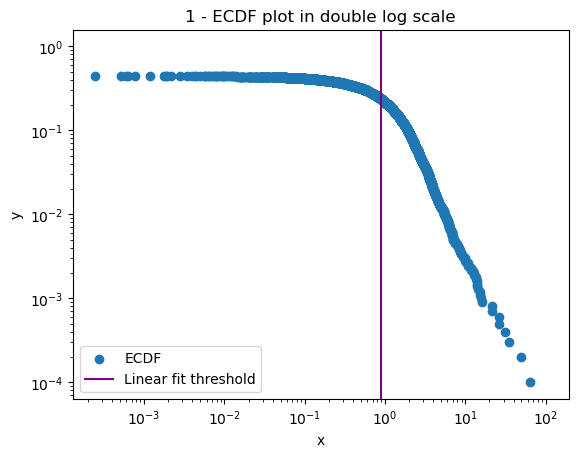

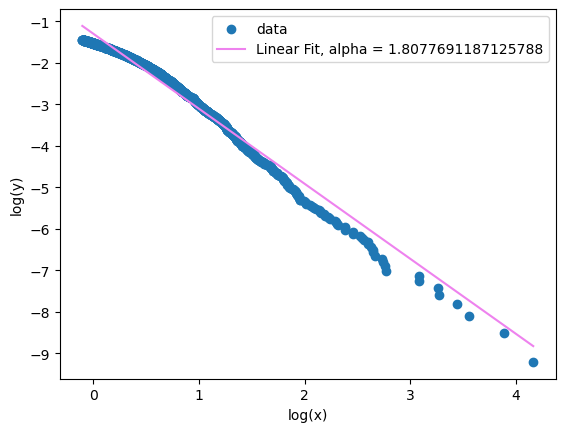

-1.8077691187125788


In [12]:
alpha, beta = 1.8, 1.
rv_size = 10 ** 4
n = 10 ** 4
threshold = 0.9

plot_ecdf(levy_stable.rvs(alpha, beta, size = rv_size), threshold)

MC simulation of $1000$ estimations of alpha paramter and histogram plot of distribution of alpha.

AVG_alpha = 1.7947297752115796
Median_alpha = 1.7943852113746719
MSE of alpha estimation = 0.0016372098099516862
MAE of alpha estimation = 0.03228018901425175


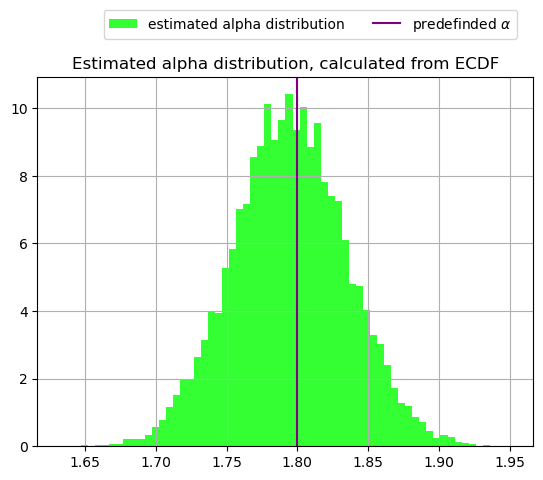

In [4]:
estimated_alpha_list = []

for i in range(n):
    estimated_alpha_list.append(
        estimate_alpha(levy_stable.rvs(alpha, beta, size = rv_size), threshold))
    
print(f'AVG_alpha = {np.mean(estimated_alpha_list)}')
print(f'Median_alpha = {np.median(estimated_alpha_list)}')

## custom made error functions:
#list of predefined alphas
alphas = alpha * np.ones(len(estimated_alpha_list))

mse_alpha = mse(alphas, estimated_alpha_list)
mae_alpha = mae(alphas, estimated_alpha_list)

print(f"MSE of alpha estimation = {mse_alpha}")
print(f"MAE of alpha estimation = {mae_alpha}")

#histogram
plt.hist(estimated_alpha_list, density=True, bins='auto', color = 'lime', histtype='stepfilled', alpha=0.8,
        label = 'estimated alpha distribution')
plt.title('Estimated alpha distribution, calculated from ECDF')
plt.axvline(alpha, color='purple', label = r'predefinded $\alpha$')
plt.legend(bbox_to_anchor =(.98, 1.2), ncol = 2)
plt.grid()
plt.show()

## Conclusions (ECDF method)
- Value of $\hat \alpha$ strongly depends on threshold value from where power law of $1 - \text(ECDF)$  is visible (linear tendention on double log scale). This threshold depends on alpha so it has to be adjusted for every random process. 
- Estimation $\hat \alpha$ depends on quality of used random number generator.
- This method performs well when sample length is > 1000.
- Simple to implement - 1D linear regression is easy to implment and understand.


# Estimation based on empirical characteristic function (CF) of  stable distribution

The function that computes the empirical CF of stable distribution:

In implementation we are using the following formula:

$$ \varphi(t) = \frac{1}{n} \sum^{n}_{j = 1} e^{itX_j}, \, i^2 = -1 ,$$ 

where $t \in [0,2]$



In [5]:
#simulate symetric stable distribution
def symetric_stable_dist(alpha,size):
    theta = np.random.uniform(-np.pi/2 , np.pi / 2,size)
    W = np.random.exponential(1,size)
    if alpha != 1:
        Z = (np.sin(alpha * theta)/(np.cos(theta))**(1/alpha)) * (np.cos((alpha - 1) * theta) / W) ** ((1 - alpha)/alpha)
    else:
        Z = np.tan(theta)
    return Z

#empirical charasteristic function implementation
def emp_CF(X,t):
    i = 0 + 1j
    phi = np.zeros(len(t))
    for j in range(len(t)):
        phi[j] = np.mean(np.exp(i*t[j]*X).real)
    return phi

def estimate_alpha(X,t):
    emp_CF_data = emp_CF(X,t)
    x = np.log(np.abs(t))
    y = np.log(-np.log(emp_CF_data ** 2))
    alpha,c = np.polyfit(x,y,1)
    return alpha,c

### Estimator that estimates alpha based on empirical CF 

We assume that characteristic function of symmetric stable distribution takes the form \

$$ \varphi_X(t) = e^{-c |t|^\alpha}$$

After transformations of this equation we have:

$$ \log{(-\log{\varphi_X(t)^2})} = \log{2c} + \alpha \log{|t|}$$

We can estimates alpha by linear regression of this model: 

$$ y = \beta + \alpha x$$

where $y = \log{(-\log{\varphi_X(t)^2})}$ , $x = \log{|t|}$ 
 
Comparision between empirical and theoretical CF:

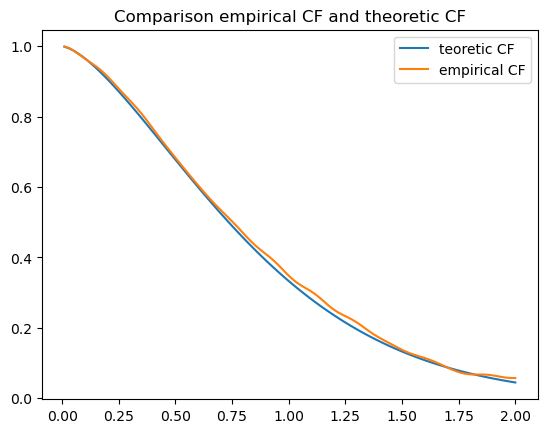

In [13]:
#empirical characteristic function with theoretic charasteric function
alpha = 1.5
t = np.linspace(0.01,2,100)
N = 100
n = 10 ** 3
X = symetric_stable_dist(alpha,n)
y_emp = emp_CF(X,t)
c = 1.1
plt.plot(t,np.exp(-c * np.abs(t) ** alpha),label = 'teoretic CF')
plt.plot(t,y_emp ,label = 'empirical CF')
plt.title('Comparison empirical CF and theoretic CF')
plt.legend()

Monte Carlo simulation of $ N = 1000$ $\alpha$ parameters based on linear regression based on ECF of symmetric stable distribution and histogram representation.

AVG_alpha = 1.5171810006155853
Median_alpha = 1.512460872053491


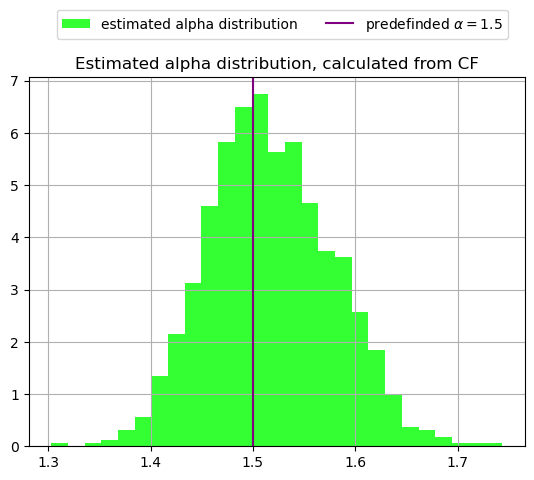

In [7]:
estimated_alphas = np.zeros(N)

for i in range(N):
    estimated_alphas[i] = estimate_alpha(symetric_stable_dist(alpha,n),t)[0]
    
print(f"AVG_alpha = {np.mean(estimated_alphas)}")
print(f"Median_alpha = {np.median(estimated_alphas)}")

#histogram
plt.hist(estimated_alphas, density=True, bins='auto', color = 'lime', histtype='stepfilled', alpha=0.8,
        label = 'estimated alpha distribution')
plt.title('Estimated alpha distribution, calculated from CF')
plt.axvline(alpha, color='purple', label = r'predefinded $\alpha=$' + str(alpha))
plt.legend(bbox_to_anchor =(.98, 1.2), ncol = 2)
plt.grid()
plt.show()